In [1]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "scraped_data_team_20.csv"
df = pd.read_csv(file_path)


DATA UNDERSTANDING


In [2]:
df.shape

(130, 11)

In [3]:
df.head()

,Title,Company,Date Posted,Salary,Location,Job Position,Work Type,Category,Premium,Application Deadline,Direct Job Link
0,Kassir,Avis Apteklər Şəbəkəsi,09 Dek,500 - 600 AZN,Bakı,Kassir,Tam-ştat,Digər,Premium,13 Yanvar 2025,https://www.hellojob.az/vakansiya/kassir-126
1,Çilingər,“Fortis Group” MMC,10 Dek,640 AZN,Bakı,Çilingər,Tam-ştat,Digər,Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/cilinger-11
2,Satış üzrə agent,My Tour Baku,08 Dek,400 - 1800 AZN,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/satis-uzre-a...
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,19 Noy,1000 - 1500 AZN,Bakı,Kredit mütəxəssisi,Tam-ştat,Kredit mütəxəssisi,Premium,24 Dekabr,https://www.hellojob.az/vakansiya/lombard-kred...
4,Customer Service Representative,Positive Call Center,15 Noy,700 - 1000 AZN,Bakı,Call-Center Operator,Tam-ştat,Operator,Premium,20 Dekabr,https://www.hellojob.az/vakansiya/customer-ser...


In [4]:
df.columns

Index(['Title', 'Company', 'Date Posted', 'Salary', 'Location', 'Job Position',
       'Work Type', 'Category', 'Premium', 'Application Deadline',
       'Direct Job Link'],
      dtype='object')

In [5]:
df.dtypes

,0
Title,object
Company,object
Date Posted,object
Salary,object
Location,object
Job Position,object
Work Type,object
Category,object
Premium,object
Application Deadline,object


In [6]:
df.describe()

,Title,Company,Date Posted,Salary,Location,Job Position,Work Type,Category,Premium,Application Deadline,Direct Job Link
count,130,130,130,130,130,130,130,130,130,130,130
unique,115,58,13,31,12,89,3,31,2,15,125
top,Kassir,Kontakt Home,10 Dek,Not Specified,Bakı,Kassir,Tam-ştat,Bank xidməti,Not Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/kassir-126
freq,3,11,33,78,116,7,128,32,117,33,2


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 130 non-null    object
 1   Company               130 non-null    object
 2   Date Posted           130 non-null    object
 3   Salary                130 non-null    object
 4   Location              130 non-null    object
 5   Job Position          130 non-null    object
 6   Work Type             130 non-null    object
 7   Category              130 non-null    object
 8   Premium               130 non-null    object
 9   Application Deadline  130 non-null    object
 10  Direct Job Link       130 non-null    object
dtypes: object(11)
memory usage: 11.3+ KB
None


DATA PREPERATION

In [8]:
# Rename columns
df=df.rename(columns={'Date Posted': 'Date_Posted', 'Job Position': 'Job_Position', 'Work Type': 'Work_Type' , 'Application Deadline': 'Application_Deadline', 'Direct Job Link': 'Direct_Job_Link'})

In [9]:
df.head()

,Title,Company,Date_Posted,Salary,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link
0,Kassir,Avis Apteklər Şəbəkəsi,09 Dek,500 - 600 AZN,Bakı,Kassir,Tam-ştat,Digər,Premium,13 Yanvar 2025,https://www.hellojob.az/vakansiya/kassir-126
1,Çilingər,“Fortis Group” MMC,10 Dek,640 AZN,Bakı,Çilingər,Tam-ştat,Digər,Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/cilinger-11
2,Satış üzrə agent,My Tour Baku,08 Dek,400 - 1800 AZN,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/satis-uzre-a...
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,19 Noy,1000 - 1500 AZN,Bakı,Kredit mütəxəssisi,Tam-ştat,Kredit mütəxəssisi,Premium,24 Dekabr,https://www.hellojob.az/vakansiya/lombard-kred...
4,Customer Service Representative,Positive Call Center,15 Noy,700 - 1000 AZN,Bakı,Call-Center Operator,Tam-ştat,Operator,Premium,20 Dekabr,https://www.hellojob.az/vakansiya/customer-ser...


In [10]:
df.isna().sum()

,0
Title,0
Company,0
Date_Posted,0
Salary,0
Location,0
Job_Position,0
Work_Type,0
Category,0
Premium,0
Application_Deadline,0


In [11]:
df.loc[df.duplicated()]

,Title,Company,Date_Posted,Salary,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link
53,Nəzarətçi,Santral Elektrik,10 Dek,550 AZN,Bakı,Dalandar/Nəzarətçi,Tam-ştat,Mühafizə xidməti,Not Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/nezaretci-mu...
54,Korporativ satış üzrə menecer,Santral Elektrik,10 Dek,700 AZN,Bakı,Korporativ satış üzrə Mütəxəssis,Tam-ştat,Satış üzrə mütəxəssis,Not Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/korporativ-s...
55,Çilingər,“Fortis Group” MMC,10 Dek,640 AZN,Bakı,Çilingər,Tam-ştat,Digər,Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/cilinger-11
85,Kassir,Avis Apteklər Şəbəkəsi,09 Dek,500 - 600 AZN,Bakı,Kassir,Tam-ştat,Digər,Premium,13 Yanvar 2025,https://www.hellojob.az/vakansiya/kassir-126
93,Satış üzrə agent,My Tour Baku,08 Dek,400 - 1800 AZN,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/satis-uzre-a...


In [12]:
df.duplicated().sum()

5

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(125, 11)

In [15]:
# Identify all text columns
text_columns = df.select_dtypes(include=['object']).columns

# Apply .str.strip() to each text column
for col in text_columns:
    df[col] = df[col].str.strip()


In [16]:
df['Salary'] = df['Salary'].replace(r'[^\d.-]', '', regex=True)
df.head()

,Title,Company,Date_Posted,Salary,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link
0,Kassir,Avis Apteklər Şəbəkəsi,09 Dek,500-600,Bakı,Kassir,Tam-ştat,Digər,Premium,13 Yanvar 2025,https://www.hellojob.az/vakansiya/kassir-126
1,Çilingər,“Fortis Group” MMC,10 Dek,640,Bakı,Çilingər,Tam-ştat,Digər,Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/cilinger-11
2,Satış üzrə agent,My Tour Baku,08 Dek,400-1800,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/satis-uzre-a...
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,19 Noy,1000-1500,Bakı,Kredit mütəxəssisi,Tam-ştat,Kredit mütəxəssisi,Premium,24 Dekabr,https://www.hellojob.az/vakansiya/lombard-kred...
4,Customer Service Representative,Positive Call Center,15 Noy,700-1000,Bakı,Call-Center Operator,Tam-ştat,Operator,Premium,20 Dekabr,https://www.hellojob.az/vakansiya/customer-ser...


In [17]:
# check salary is string
df['Salary'] = df['Salary'].astype(str)


# Safely split the 'Salary' column into 'Salary_Min' and 'Salary_Max'
df[['Salary_Min', 'Salary_Max']] = df['Salary'].str.extract(r'(\d+)\s*-\s*(\d+)', expand=True)

In [18]:
# Convert the extracted values to numeric, filling any invalid values with NaN
df['Salary_Min'] = pd.to_numeric(df['Salary_Min'], errors='coerce')
df['Salary_Max'] = pd.to_numeric(df['Salary_Max'], errors='coerce')

In [19]:
df = df.drop(columns=['Salary'])

In [20]:
df.head()

,Title,Company,Date_Posted,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link,Salary_Min,Salary_Max
0,Kassir,Avis Apteklər Şəbəkəsi,09 Dek,Bakı,Kassir,Tam-ştat,Digər,Premium,13 Yanvar 2025,https://www.hellojob.az/vakansiya/kassir-126,500.0,600.0
1,Çilingər,“Fortis Group” MMC,10 Dek,Bakı,Çilingər,Tam-ştat,Digər,Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/cilinger-11,NaN,NaN
2,Satış üzrə agent,My Tour Baku,08 Dek,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/satis-uzre-a...,400.0,1800.0
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,19 Noy,Bakı,Kredit mütəxəssisi,Tam-ştat,Kredit mütəxəssisi,Premium,24 Dekabr,https://www.hellojob.az/vakansiya/lombard-kred...,1000.0,1500.0
4,Customer Service Representative,Positive Call Center,15 Noy,Bakı,Call-Center Operator,Tam-ştat,Operator,Premium,20 Dekabr,https://www.hellojob.az/vakansiya/customer-ser...,700.0,1000.0


In [21]:
print(df['Salary_Min'].describe())
print(df['Salary_Max'].describe())


count      36.000000
mean      600.000000
std       186.700677
min       100.000000
25%       500.000000
50%       600.000000
75%       700.000000
max      1000.000000
Name: Salary_Min, dtype: float64
count      36.000000
mean     1016.666667
std       390.238023
min       400.000000
25%       700.000000
50%      1000.000000
75%      1200.000000
max      2000.000000
Name: Salary_Max, dtype: float64


In [22]:
df['Salary_Min'].fillna(df['Salary_Min'].median(), inplace=True)
df['Salary_Max'].fillna(df['Salary_Max'].median(), inplace=True)


<ipython-input-22-4165ebfb3dd0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary_Min'].fillna(df['Salary_Min'].median(), inplace=True)
<ipython-input-22-4165ebfb3dd0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [23]:
df.head(100)

,Title,Company,Date_Posted,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link,Salary_Min,Salary_Max
0,Kassir,Avis Apteklər Şəbəkəsi,09 Dek,Bakı,Kassir,Tam-ştat,Digər,Premium,13 Yanvar 2025,https://www.hellojob.az/vakansiya/kassir-126,500.0,600.0
1,Çilingər,“Fortis Group” MMC,10 Dek,Bakı,Çilingər,Tam-ştat,Digər,Premium,14 Yanvar 2025,https://www.hellojob.az/vakansiya/cilinger-11,600.0,1000.0
2,Satış üzrə agent,My Tour Baku,08 Dek,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/satis-uzre-a...,400.0,1800.0
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,19 Noy,Bakı,Kredit mütəxəssisi,Tam-ştat,Kredit mütəxəssisi,Premium,24 Dekabr,https://www.hellojob.az/vakansiya/lombard-kred...,1000.0,1500.0
4,Customer Service Representative,Positive Call Center,15 Noy,Bakı,Call-Center Operator,Tam-ştat,Operator,Premium,20 Dekabr,https://www.hellojob.az/vakansiya/customer-ser...,700.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Ofis meneceri,Tivi Group,08 Dek,Bakı,Ofis meneceri,Tam-ştat,Ofis menecmenti,Not Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/ofis-menecer...,500.0,1000.0
101,Biznesin İnkişafı İdarəsinin Tərəfdaş şəbəkəsi...,Xalq Bank,08 Dek,Bakı,Tərəfdaşlar ilə əməkdaşlıq üzrə nümayəndə,Tam-ştat,Bank xidməti,Not Premium,12 Yanvar 2025,https://www.hellojob.az/vakansiya/biznesin-ink...,600.0,1000.0
102,Sosial Media Marketinq (SMM) mütəxəssisi,Balique.az,07 Dek,Bakı,Sosial Media Marketinq (SMM) mütəxəssisi,Tam-ştat,SMM,Not Premium,11 Yanvar 2025,https://www.hellojob.az/vakansiya/sosial-media...,700.0,1000.0
103,Satış Meneceri,ShakhMotors,07 Dek,Bakı,Satış Meneceri,Tam-ştat,Satış üzrə mütəxəssis,Not Premium,11 Yanvar 2025,https://www.hellojob.az/vakansiya/satis-menece...,500.0,700.0


In [24]:
month_mapping = {
    'Yanvar': 'January',
    'Fevral': 'February',
    'Mart': 'March',
    'Aprel': 'April',
    'May': 'May',
    'Iyun': 'June',
    'Iyul': 'July',
    'Avqust': 'August',
    'Sentyabr': 'September',
    'Oktyabr': 'October',
    'Noyabr': 'November',
    'Dekabr': 'December',
    'Yan': 'January',    # Added for shortened 'Yan'
    'Dek': 'December',   # Added for shortened 'Dek'
    'Noy': 'November'    # Added for shortened 'Noy'

}
# Apply the mapping to both 'Date Posted' and 'Application Deadline' columns
df['Date_Posted'] = df['Date_Posted'].replace(month_mapping, regex=True)
df['Application_Deadline'] = df['Application_Deadline'].replace(month_mapping, regex=True)

print(df[['Date_Posted', 'Application_Deadline']].head())


   Date_Posted Application_Deadline
0  09 December      13 January 2025
1  10 December      14 January 2025
2  08 December      12 January 2025
3  19 November          24 December
4  15 November          20 December


In [25]:
from datetime import datetime
default_year = 2024

# Get today's date as a datetime object
today_date = datetime.today().strftime("%d %B %Y")

# Define a function to handle date formats
def handle_date_format(x):
    # Handle "Bu gün" (Today)
    if x == "Bu gün":
        return today_date  # To replace with today's date in day-month-year format

    # Add the default year to month-day format
    return f"{x} {default_year}"

# Apply the function to the column
df['Date_Posted'] = df['Date_Posted'].apply(handle_date_format)

# Convert to datetime format
df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], errors='coerce', dayfirst=True)

print(df['Date_Posted'])

0     2024-12-09
1     2024-12-10
2     2024-12-08
3     2024-11-19
4     2024-11-15
         ...    
125   2024-12-06
126   2024-12-06
127   2024-12-06
128   2024-12-06
129   2024-12-06
Name: Date_Posted, Length: 125, dtype: datetime64[ns]


In [26]:
df.head(100)

,Title,Company,Date_Posted,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link,Salary_Min,Salary_Max
0,Kassir,Avis Apteklər Şəbəkəsi,2024-12-09,Bakı,Kassir,Tam-ştat,Digər,Premium,13 January 2025,https://www.hellojob.az/vakansiya/kassir-126,500.0,600.0
1,Çilingər,“Fortis Group” MMC,2024-12-10,Bakı,Çilingər,Tam-ştat,Digər,Premium,14 January 2025,https://www.hellojob.az/vakansiya/cilinger-11,600.0,1000.0
2,Satış üzrə agent,My Tour Baku,2024-12-08,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,12 January 2025,https://www.hellojob.az/vakansiya/satis-uzre-a...,400.0,1800.0
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,2024-11-19,Bakı,Kredit mütəxəssisi,Tam-ştat,Kredit mütəxəssisi,Premium,24 December,https://www.hellojob.az/vakansiya/lombard-kred...,1000.0,1500.0
4,Customer Service Representative,Positive Call Center,2024-11-15,Bakı,Call-Center Operator,Tam-ştat,Operator,Premium,20 December,https://www.hellojob.az/vakansiya/customer-ser...,700.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Ofis meneceri,Tivi Group,2024-12-08,Bakı,Ofis meneceri,Tam-ştat,Ofis menecmenti,Not Premium,12 January 2025,https://www.hellojob.az/vakansiya/ofis-menecer...,500.0,1000.0
101,Biznesin İnkişafı İdarəsinin Tərəfdaş şəbəkəsi...,Xalq Bank,2024-12-08,Bakı,Tərəfdaşlar ilə əməkdaşlıq üzrə nümayəndə,Tam-ştat,Bank xidməti,Not Premium,12 January 2025,https://www.hellojob.az/vakansiya/biznesin-ink...,600.0,1000.0
102,Sosial Media Marketinq (SMM) mütəxəssisi,Balique.az,2024-12-07,Bakı,Sosial Media Marketinq (SMM) mütəxəssisi,Tam-ştat,SMM,Not Premium,11 January 2025,https://www.hellojob.az/vakansiya/sosial-media...,700.0,1000.0
103,Satış Meneceri,ShakhMotors,2024-12-07,Bakı,Satış Meneceri,Tam-ştat,Satış üzrə mütəxəssis,Not Premium,11 January 2025,https://www.hellojob.az/vakansiya/satis-menece...,500.0,700.0


In [27]:
df['Application_Deadline'] = df['Application_Deadline'].str.strip()

In [28]:
import pandas as pd



# Set default year to 2024
default_year = 2024

# Add default year if a year is missing
def add_default_year(value):
    try:
        # Check if a year is already present
        if ' ' in value and len(value.split()) == 2:

            return f"{value} {default_year}"
        else:
            # If year is present, keep as is
            return value
    except ValueError:
        return value

# Apply the function to the column
df['Application_Deadline'] = df['Application_Deadline'].apply(add_default_year)

# Convert to datetime (with default year applied)
df['Application_Deadline'] = pd.to_datetime(df['Application_Deadline'], errors='coerce', dayfirst=True)

print(df['Application_Deadline'])


0     2025-01-13
1     2025-01-14
2     2025-01-12
3     2024-12-24
4     2024-12-20
         ...    
125   2025-01-10
126   2025-01-10
127   2025-01-10
128   2025-01-10
129   2025-01-10
Name: Application_Deadline, Length: 125, dtype: datetime64[ns]


In [29]:
# Convert to datetime now that we've cleaned the values
df['Application_Deadline'] = pd.to_datetime(df['Application_Deadline'], errors='coerce', dayfirst=True)


print(df['Application_Deadline'].head())


0   2025-01-13
1   2025-01-14
2   2025-01-12
3   2024-12-24
4   2024-12-20
Name: Application_Deadline, dtype: datetime64[ns]


In [30]:
# Check if there are any remaining NaT values
print(df['Application_Deadline'].isna().sum())


0


In [31]:
df.head(100)

,Title,Company,Date_Posted,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link,Salary_Min,Salary_Max
0,Kassir,Avis Apteklər Şəbəkəsi,2024-12-09,Bakı,Kassir,Tam-ştat,Digər,Premium,2025-01-13,https://www.hellojob.az/vakansiya/kassir-126,500.0,600.0
1,Çilingər,“Fortis Group” MMC,2024-12-10,Bakı,Çilingər,Tam-ştat,Digər,Premium,2025-01-14,https://www.hellojob.az/vakansiya/cilinger-11,600.0,1000.0
2,Satış üzrə agent,My Tour Baku,2024-12-08,Bakı,Satış üzrə agent,Tam-ştat,Turizm və mehmanxana işi,Premium,2025-01-12,https://www.hellojob.az/vakansiya/satis-uzre-a...,400.0,1800.0
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,2024-11-19,Bakı,Kredit mütəxəssisi,Tam-ştat,Kredit mütəxəssisi,Premium,2024-12-24,https://www.hellojob.az/vakansiya/lombard-kred...,1000.0,1500.0
4,Customer Service Representative,Positive Call Center,2024-11-15,Bakı,Call-Center Operator,Tam-ştat,Operator,Premium,2024-12-20,https://www.hellojob.az/vakansiya/customer-ser...,700.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Ofis meneceri,Tivi Group,2024-12-08,Bakı,Ofis meneceri,Tam-ştat,Ofis menecmenti,Not Premium,2025-01-12,https://www.hellojob.az/vakansiya/ofis-menecer...,500.0,1000.0
101,Biznesin İnkişafı İdarəsinin Tərəfdaş şəbəkəsi...,Xalq Bank,2024-12-08,Bakı,Tərəfdaşlar ilə əməkdaşlıq üzrə nümayəndə,Tam-ştat,Bank xidməti,Not Premium,2025-01-12,https://www.hellojob.az/vakansiya/biznesin-ink...,600.0,1000.0
102,Sosial Media Marketinq (SMM) mütəxəssisi,Balique.az,2024-12-07,Bakı,Sosial Media Marketinq (SMM) mütəxəssisi,Tam-ştat,SMM,Not Premium,2025-01-11,https://www.hellojob.az/vakansiya/sosial-media...,700.0,1000.0
103,Satış Meneceri,ShakhMotors,2024-12-07,Bakı,Satış Meneceri,Tam-ştat,Satış üzrə mütəxəssis,Not Premium,2025-01-11,https://www.hellojob.az/vakansiya/satis-menece...,500.0,700.0


In [32]:
# Convert the 'Premium' column from categorical values ('Premium' and 'Not Premium') for further analysis
# to binary numeric values (1 and 0)

df['Premium'] = df['Premium'].map({'Premium': 1, 'Not Premium': 0})


In [33]:
# check for unexpected or missing values
print(df['Premium'].unique())
print(df['Premium'].isna().sum())

[1 0]
0


In [34]:
# fill missing values with 0 (assuming default is 'Not Premium')
df['Premium'] = df['Premium'].fillna(0)


In [35]:

df['Work_Type'] = df['Work_Type'].fillna('Unknown') #handling missing values

df['Work_Type'] = df['Work_Type'].map({'Tam-ştat': 1, 'Part-time': 0, 'Freelance': -1})

# Convert to integers, handling NaN values
df['Work_Type'] = pd.to_numeric(df['Work_Type'], errors='coerce').astype(pd.Int64Dtype())

In [36]:
df.head(100)

,Title,Company,Date_Posted,Location,Job_Position,Work_Type,Category,Premium,Application_Deadline,Direct_Job_Link,Salary_Min,Salary_Max
0,Kassir,Avis Apteklər Şəbəkəsi,2024-12-09,Bakı,Kassir,1,Digər,1,2025-01-13,https://www.hellojob.az/vakansiya/kassir-126,500.0,600.0
1,Çilingər,“Fortis Group” MMC,2024-12-10,Bakı,Çilingər,1,Digər,1,2025-01-14,https://www.hellojob.az/vakansiya/cilinger-11,600.0,1000.0
2,Satış üzrə agent,My Tour Baku,2024-12-08,Bakı,Satış üzrə agent,1,Turizm və mehmanxana işi,1,2025-01-12,https://www.hellojob.az/vakansiya/satis-uzre-a...,400.0,1800.0
3,Lombard Krediti mütəxəssisi,AMB Rahat Kredit Evi,2024-11-19,Bakı,Kredit mütəxəssisi,1,Kredit mütəxəssisi,1,2024-12-24,https://www.hellojob.az/vakansiya/lombard-kred...,1000.0,1500.0
4,Customer Service Representative,Positive Call Center,2024-11-15,Bakı,Call-Center Operator,1,Operator,1,2024-12-20,https://www.hellojob.az/vakansiya/customer-ser...,700.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
100,Ofis meneceri,Tivi Group,2024-12-08,Bakı,Ofis meneceri,1,Ofis menecmenti,0,2025-01-12,https://www.hellojob.az/vakansiya/ofis-menecer...,500.0,1000.0
101,Biznesin İnkişafı İdarəsinin Tərəfdaş şəbəkəsi...,Xalq Bank,2024-12-08,Bakı,Tərəfdaşlar ilə əməkdaşlıq üzrə nümayəndə,1,Bank xidməti,0,2025-01-12,https://www.hellojob.az/vakansiya/biznesin-ink...,600.0,1000.0
102,Sosial Media Marketinq (SMM) mütəxəssisi,Balique.az,2024-12-07,Bakı,Sosial Media Marketinq (SMM) mütəxəssisi,1,SMM,0,2025-01-11,https://www.hellojob.az/vakansiya/sosial-media...,700.0,1000.0
103,Satış Meneceri,ShakhMotors,2024-12-07,Bakı,Satış Meneceri,1,Satış üzrə mütəxəssis,0,2025-01-11,https://www.hellojob.az/vakansiya/satis-menece...,500.0,700.0


In [37]:
df.to_csv(file_path, index=False)

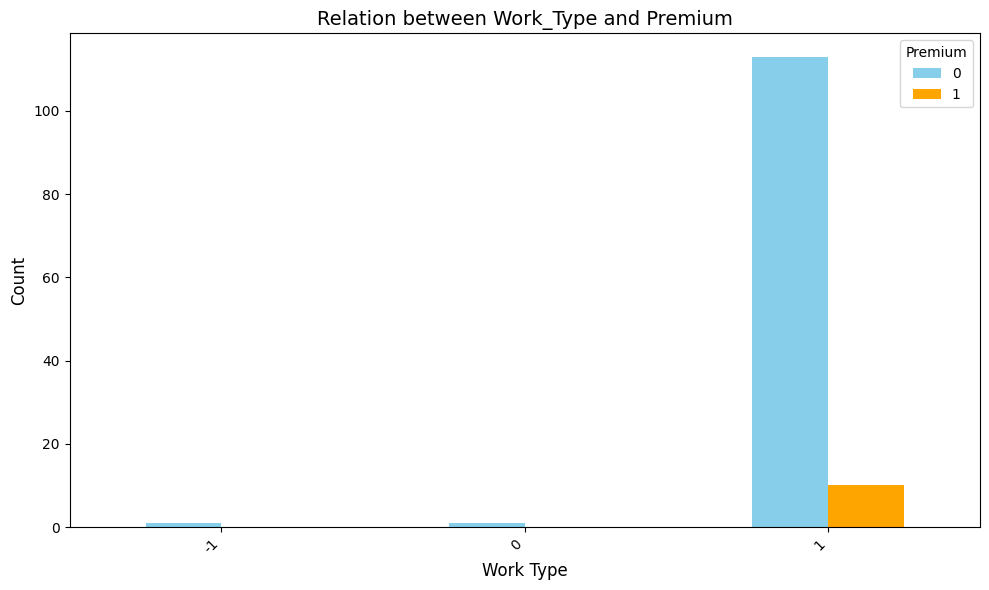

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'scraped_data_team_20.csv'
df = pd.read_csv(file_path)

#  a relation table between Work Type and Premium
relation_table = pd.crosstab(df['Work_Type'], df['Premium'])

# plot the relation table as a grouped bar chart
relation_table.plot(kind='bar', figsize=(10, 6), stacked=False, color=['skyblue', 'orange'])


plt.title('Relation between Work_Type and Premium', fontsize=14)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Premium', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


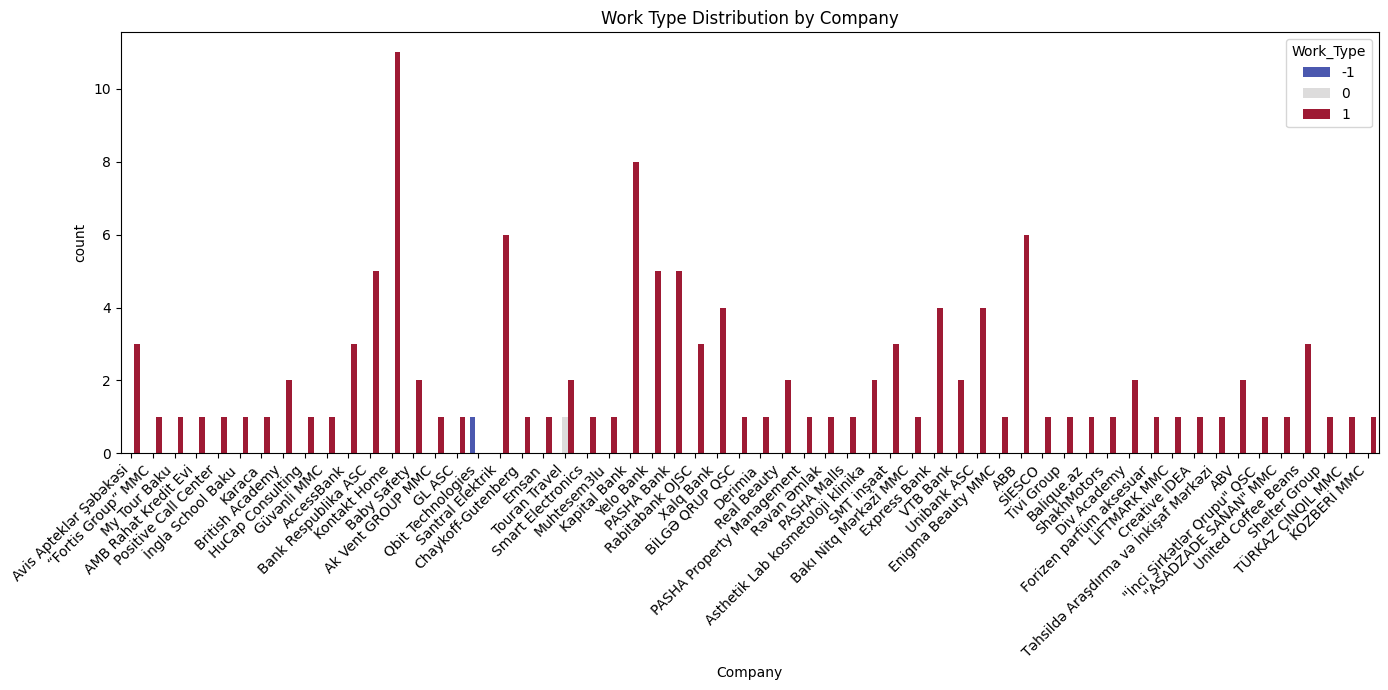

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Company', hue='Work_Type', palette='coolwarm')


plt.xticks(rotation=45, ha='right')


plt.title('Work Type Distribution by Company')
plt.tight_layout()

# visualize
plt.show()


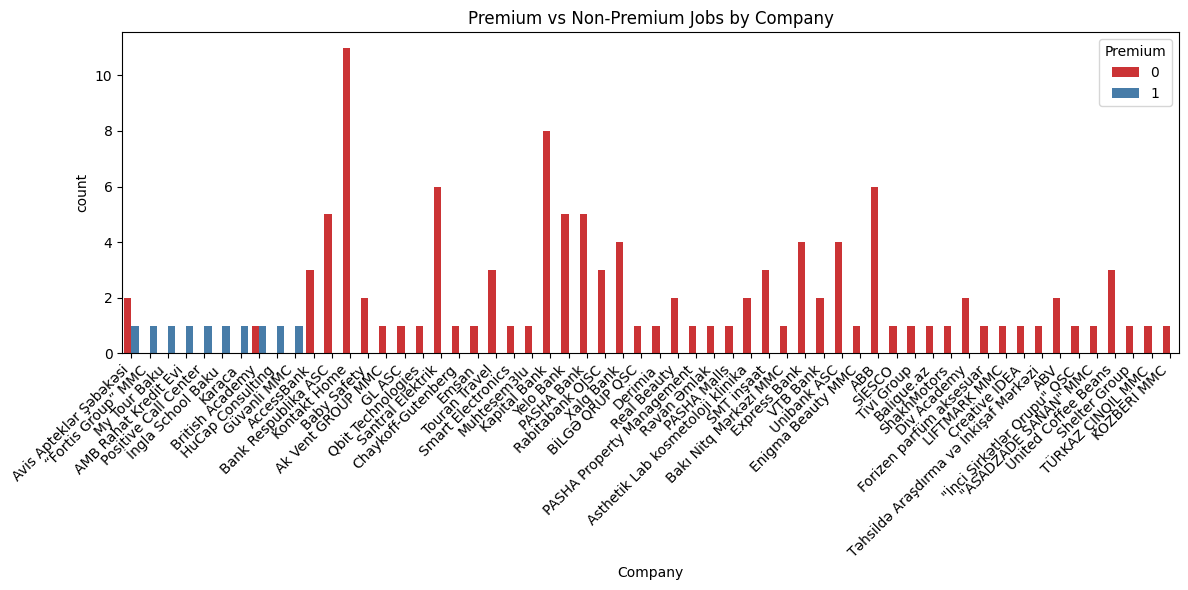

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Company', hue='Premium', palette="Set1")
plt.xticks(rotation=45, ha='right')
plt.title('Premium vs Non-Premium Jobs by Company')
plt.tight_layout()
plt.show()


Available columns in the dataset: Index(['Title', 'Company', 'Date_Posted', 'Location', 'Job_Position',
       'Work_Type', 'Category', 'Premium', 'Application_Deadline',
       'Direct_Job_Link', 'Salary_Min', 'Salary_Max'],
      dtype='object')
Correlation between job categories and minimum salary: 0.06


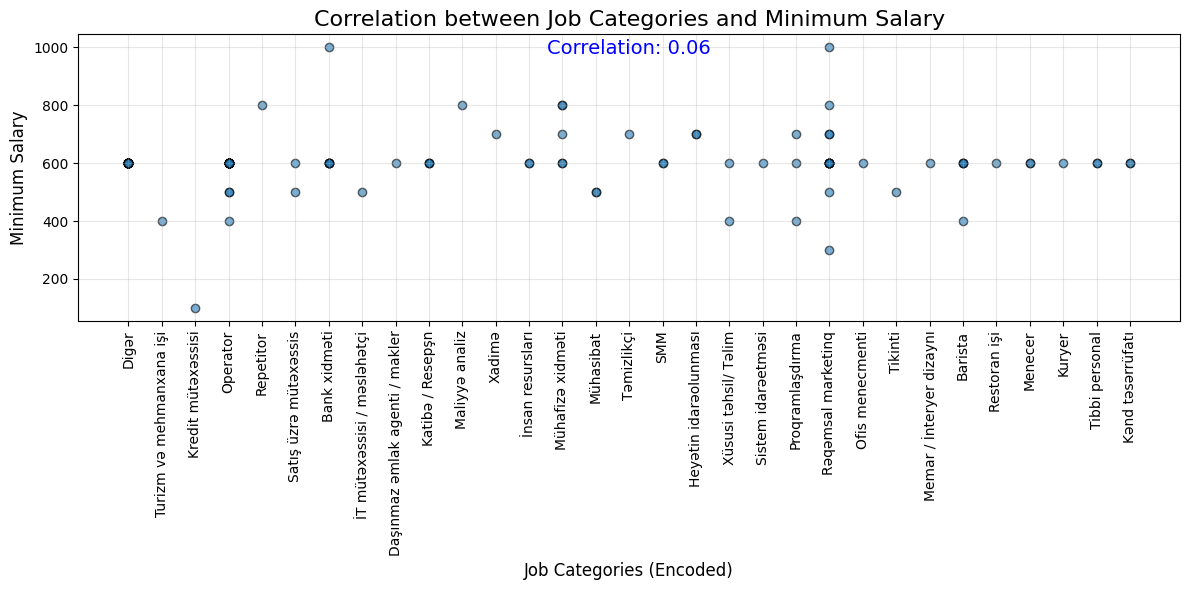

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "scraped_data_team_20.csv"
data = pd.read_csv(file_path)

print("Available columns in the dataset:", data.columns)

# Check if 'Category' column exists
if 'Category' in data.columns:
    # Encode the 'Category' column numerically for correlation analysis
    category_encoded = data['Category'].astype('category').cat.codes

    # Add the encoded categories back to the DataFrame
    data['Category_Encoded'] = category_encoded

    # Calculate correlation
    correlation = data[['Category_Encoded', 'Salary_Min']].corr().iloc[0, 1]
    print(f"Correlation between job categories and minimum salary: {correlation:.2f}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.scatter(category_encoded, data['Salary_Min'], alpha=0.6, edgecolor='k')
    plt.title('Correlation between Job Categories and Minimum Salary', fontsize=16)
    plt.xlabel('Job Categories (Encoded)', fontsize=12)
    plt.ylabel('Minimum Salary', fontsize=12)
    plt.xticks(ticks=np.unique(category_encoded), labels=data['Category'].unique(), rotation=90)
    plt.grid(alpha=0.3)

    plt.text(0.5, 0.95, f'Correlation: {correlation:.2f}', horizontalalignment='center',
             verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, color='blue')

    plt.tight_layout()
    plt.show()
else:
    print("The 'Category' column does not exist in the dataset. Please check the dataset structure.")


Correlation between job categories and maximum salary: -0.02


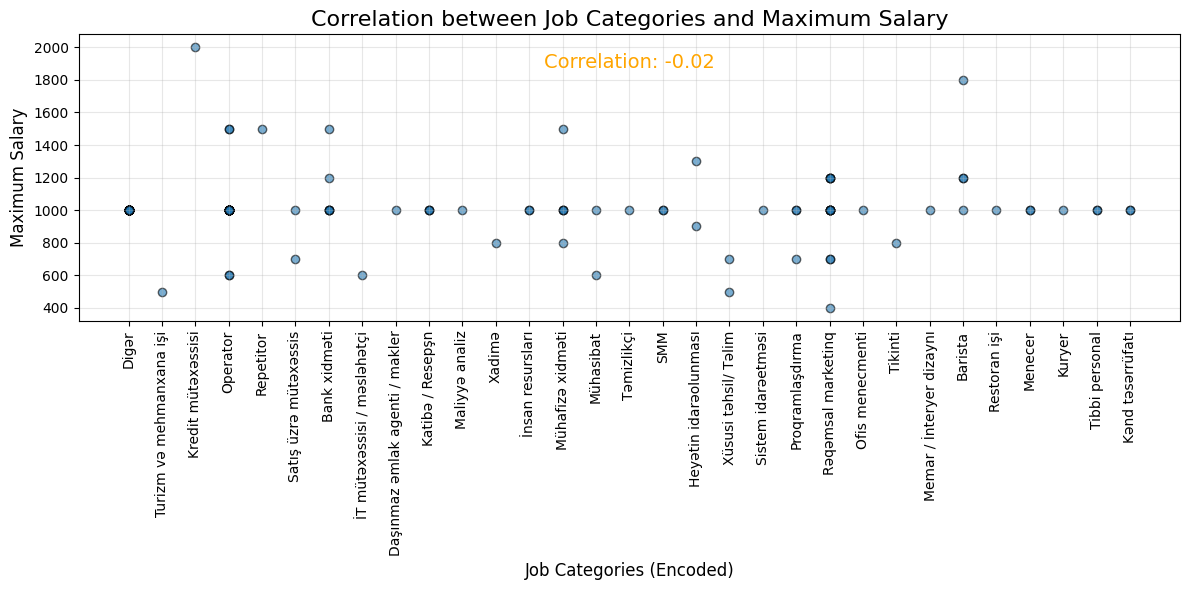

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the given file path
file_path = "scraped_data_team_20.csv"
data = pd.read_csv(file_path)

try:
    if 'Category' in data:
        # Convert the 'Category' column into numeric values (make it easier to analyze)
        category_encoded = data['Category'].astype('category').cat.codes

        # Add these numeric representations back to the dataset as a new column
        data['Category_Encoded'] = category_encoded

        correlation_max = data[['Category_Encoded', 'Salary_Max']].corr().iloc[0, 1]

        # Show the correlation value in the terminal
        print(f"Correlation between job categories and maximum salary: {correlation_max:.2f}")

        # Visualizing
        plt.figure(figsize=(12, 6))
        # Plot the data points
        plt.scatter(category_encoded, data['Salary_Max'], alpha=0.6, edgecolor='k')
        # Add a title and axis labels
        plt.title('Correlation between Job Categories and Maximum Salary', fontsize=16)
        plt.xlabel('Job Categories (Encoded)', fontsize=12)  # X-axis shows encoded job categories
        plt.ylabel('Maximum Salary', fontsize=12)  # Y-axis shows maximum salary
        # Display category names on the X-axis
        plt.xticks(ticks=np.unique(category_encoded), labels=data['Category'].unique(), rotation=90)
        plt.grid(alpha=0.3)  # Light grid lines for better readability

        # Add a text annotation on the plot showing the correlation value
        plt.text(
            0.5, 0.9,  # Position the text in the upper-middle of the plot
            f'Correlation: {correlation_max:.2f}',
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,
            fontsize=14,
            color='orange'
        )

        plt.tight_layout()
        plt.show()
    else:
        # If 'Category' column isn't found, error message will be displayed
        print("The 'Category' column does not exist in the dataset. Please check the dataset structure.")
except Exception as e:
    # Handle unexpected errors gracefully and display them
    print(f"An error occurred: {e}")


Correlation between work types and minimum salary: 0.41


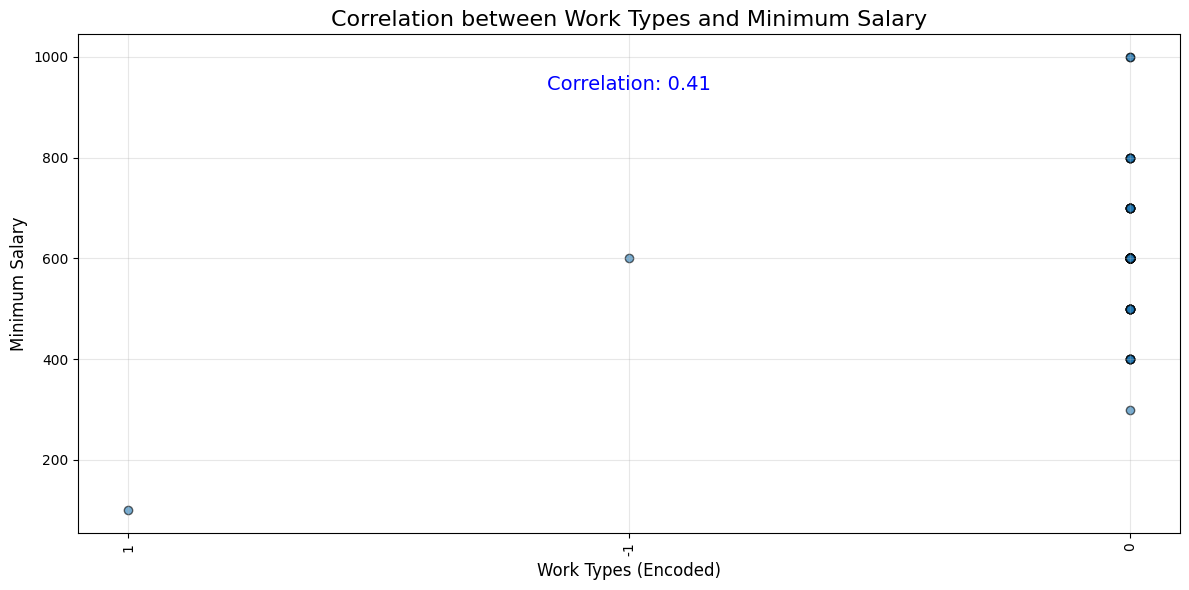

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "scraped_data_team_20.csv"
data = pd.read_csv(file_path)

# Work_Type and Salary_Min correlation
try:
    if 'Work_Type' in data:
        # Makw the 'Work_Type' column numerically for correlation analysis
        work_type_encoded = data['Work_Type'].astype('category').cat.codes

        # Add the work types back to the DataFrame
        data['Work_Type_Encoded'] = work_type_encoded

        correlation_min = data[['Work_Type_Encoded', 'Salary_Min']].corr().iloc[0, 1]

        # Print the correlation value
        print(f"Correlation between work types and minimum salary: {correlation_min:.2f}")

        # Visualization for minimum salary
        plt.figure(figsize=(12, 6))
        plt.scatter(work_type_encoded, data['Salary_Min'], alpha=0.6, edgecolor='k')
        plt.title('Correlation between Work Types and Minimum Salary', fontsize=16)
        plt.xlabel('Work Types (Encoded)', fontsize=12)
        plt.ylabel('Minimum Salary', fontsize=12)
        plt.xticks(ticks=np.unique(work_type_encoded), labels=data['Work_Type'].unique(), rotation=90)
        plt.grid(alpha=0.3)

        plt.text(
            0.5, 0.9,  # Position in axes-relative coordinates
            f'Correlation: {correlation_min:.2f}',
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,
            fontsize=14,
            color='blue'
        )

        plt.tight_layout()
        plt.show()
    else:
        print("The 'Work_Type' column does not exist in the dataset. Please check the dataset structure.")
except Exception as e:
    print(f"An error occurred: {e}")


Correlation between work types and maximum salary: -0.39


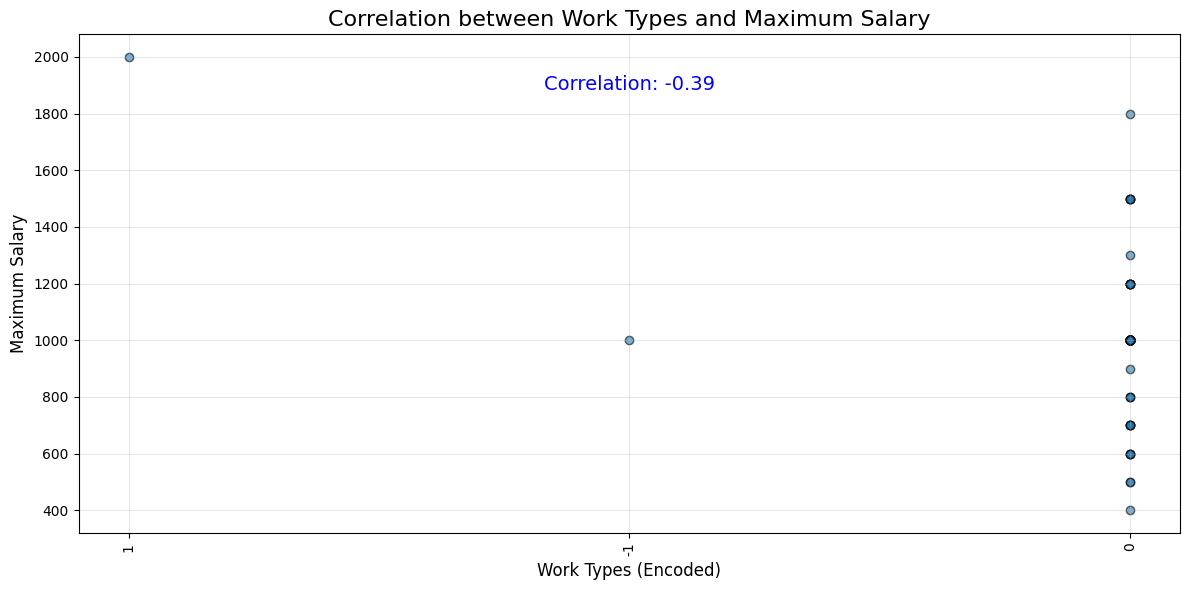

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "scraped_data_team_20.csv"  # Update the path if needed
data = pd.read_csv(file_path)

# Work_Type and Salary_Max correlation
try:
    if 'Work_Type' in data:
        # Encode the 'Work_Type' column numerically for correlation analysis
        work_type_encoded = data['Work_Type'].astype('category').cat.codes

        # Add the encoded work types back to the DataFrame
        data['Work_Type_Encoded'] = work_type_encoded

        # Calculate correlation for maximum salary
        correlation_max = data[['Work_Type_Encoded', 'Salary_Max']].corr().iloc[0, 1]

        # Print the correlation value
        print(f"Correlation between work types and maximum salary: {correlation_max:.2f}")

        # Visualization for maximum salary
        plt.figure(figsize=(12, 6))
        plt.scatter(work_type_encoded, data['Salary_Max'], alpha=0.6, edgecolor='k')
        plt.title('Correlation between Work Types and Maximum Salary', fontsize=16)
        plt.xlabel('Work Types (Encoded)', fontsize=12)
        plt.ylabel('Maximum Salary', fontsize=12)
        plt.xticks(ticks=np.unique(work_type_encoded), labels=data['Work_Type'].unique(), rotation=90)
        plt.grid(alpha=0.3)

        # Annotate the correlation on the plot
        plt.text(
            0.5, 0.9,  # Position in axes-relative coordinates
            f'Correlation: {correlation_max:.2f}',
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,
            fontsize=14,
            color='blue'
        )

        plt.tight_layout()
        plt.show()

    else:
        print("The 'Work_Type' column does not exist in the dataset. Please check the dataset structure.")
except Exception as e:
    print(f"An error occurred: {e}")


Correlation between companies and minimum salary: -0.08


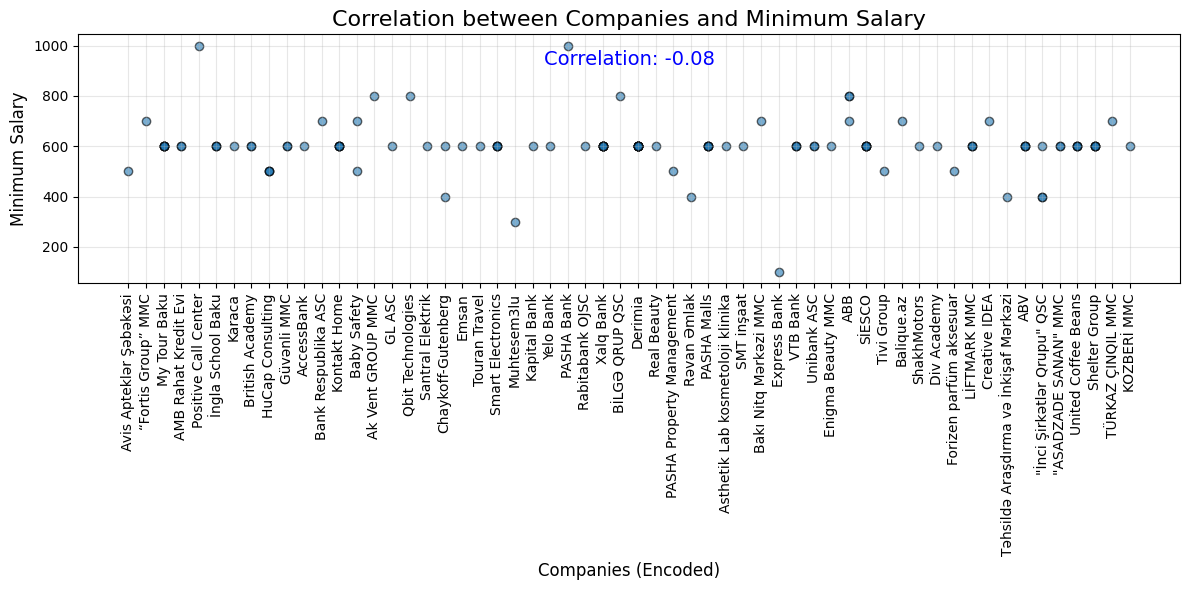

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "scraped_data_team_20.csv"
data = pd.read_csv(file_path)

# Company and Salary_Min correlation
try:
    if 'Company' in data:
        # Making the 'Company' column numerically for correlation analysis
        company_encoded = data['Company'].astype('category').cat.codes

        # Add the companies back to the DataFrame
        data['Company_Encoded'] = company_encoded

        correlation_min_salary = data[['Company_Encoded', 'Salary_Min']].corr().iloc[0, 1]

        # Print the correlation value
        print(f"Correlation between companies and minimum salary: {correlation_min_salary:.2f}")

        # Visualization for minimum salary
        plt.figure(figsize=(12, 6))
        plt.scatter(company_encoded, data['Salary_Min'], alpha=0.6, edgecolor='k')
        plt.title('Correlation between Companies and Minimum Salary', fontsize=16)
        plt.xlabel('Companies (Encoded)', fontsize=12)
        plt.ylabel('Minimum Salary', fontsize=12)
        plt.xticks(ticks=np.unique(company_encoded), labels=data['Company'].unique(), rotation=90)
        plt.grid(alpha=0.3)

        plt.text(
            0.5, 0.9,  # Position in axes-relative coordinates
            f'Correlation: {correlation_min_salary:.2f}',
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,
            fontsize=14,
            color='blue'
        )

        plt.tight_layout()
        plt.show()
#eror message
    else:
        print("The 'Company' column does not exist in the dataset. Please check the dataset structure.")
except Exception as e:
    print(f"An error occurred: {e}")


Correlation between companies and maximum salary: -0.01


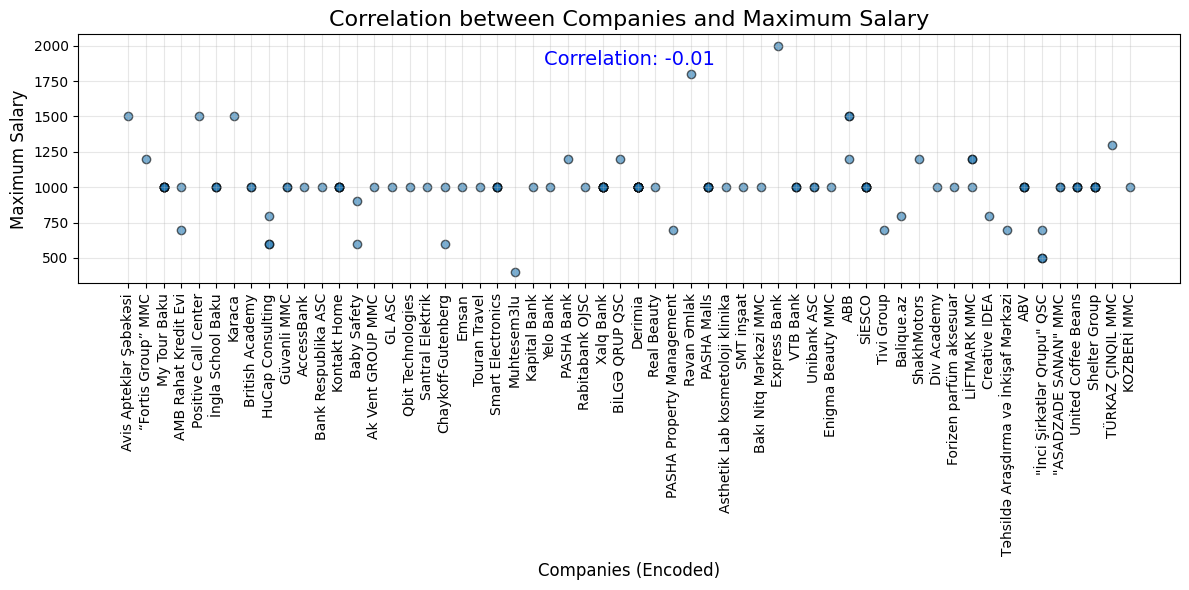

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "scraped_data_team_20.csv"
data = pd.read_csv(file_path)

# Company and Salary_Max correlation
try:
    if 'Company' in data:
        # make the 'Company' column numerically for correlation analysis
        company_encoded = data['Company'].astype('category').cat.codes

        # Add the companies back to the DataFrame
        data['Company_Encoded'] = company_encoded

        correlation_max_salary = data[['Company_Encoded', 'Salary_Max']].corr().iloc[0, 1]

        # Print the correlation value
        print(f"Correlation between companies and maximum salary: {correlation_max_salary:.2f}")

        # Visualization for maximum salary
        plt.figure(figsize=(12, 6))
        plt.scatter(company_encoded, data['Salary_Max'], alpha=0.6, edgecolor='k')
        plt.title('Correlation between Companies and Maximum Salary', fontsize=16)
        plt.xlabel('Companies (Encoded)', fontsize=12)
        plt.ylabel('Maximum Salary', fontsize=12)
        plt.xticks(ticks=np.unique(company_encoded), labels=data['Company'].unique(), rotation=90)
        plt.grid(alpha=0.3)

        plt.text(
            0.5, 0.9,  # Position in axes-relative coordinates
            f'Correlation: {correlation_max_salary:.2f}',
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,
            fontsize=14,
            color='blue'
        )

        plt.tight_layout()
        plt.show()
#error handling
    else:
        print("The 'Company' column does not exist in the dataset. Please check the dataset structure.")#error message
except Exception as e:
    print(f"An error occurred: {e}")


Correlation between premium and minimum salary: 0.30


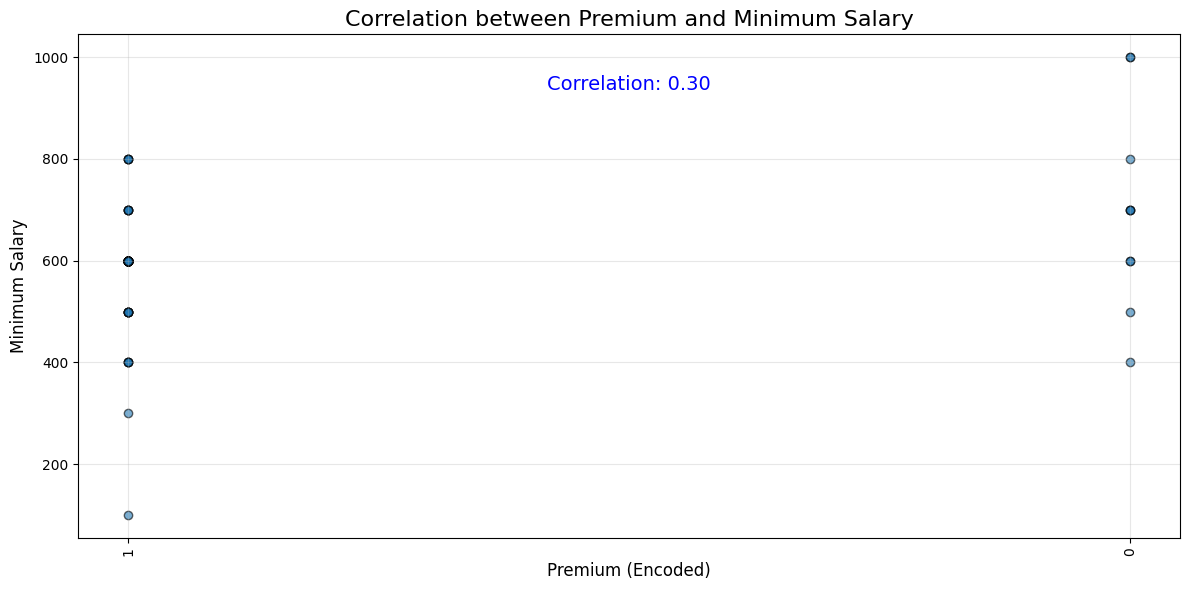

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "scraped_data_team_20.csv"
data = pd.read_csv(file_path)

# Premium and Salary_Min correlation
try:
    if 'Premium' in data:
        # Encode the 'Premium' column numerically
        premium_encoded = data['Premium'].astype('category').cat.codes

        # Add the encoded premium values back to the DataFrame
        data['Premium_Encoded'] = premium_encoded

        # Calculate correlation for minimum salary
        correlation_min_salary = data[['Premium_Encoded', 'Salary_Min']].corr().iloc[0, 1]

        # Print the correlation value
        print(f"Correlation between premium and minimum salary: {correlation_min_salary:.2f}")

        # Visualization for minimum salary
        plt.figure(figsize=(12, 6))
        plt.scatter(premium_encoded, data['Salary_Min'], alpha=0.6, edgecolor='k')
        plt.title('Correlation between Premium and Minimum Salary', fontsize=16)
        plt.xlabel('Premium (Encoded)', fontsize=12)
        plt.ylabel('Minimum Salary', fontsize=12)
        plt.xticks(ticks=np.unique(premium_encoded), labels=data['Premium'].unique(), rotation=90)
        plt.grid(alpha=0.3)

        plt.text(
            0.5, 0.9,  # Position in axes-relative coordinates
            f'Correlation: {correlation_min_salary:.2f}',
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,
            fontsize=14,
            color='blue'
        )

        plt.tight_layout()
        plt.show()
# Error message
    else:
        print("The 'Premium' column does not exist in the dataset. Please check the dataset structure.")
except Exception as e:
    print(f"An error occurred: {e}")


Correlation between premium and maximum salary: 0.21


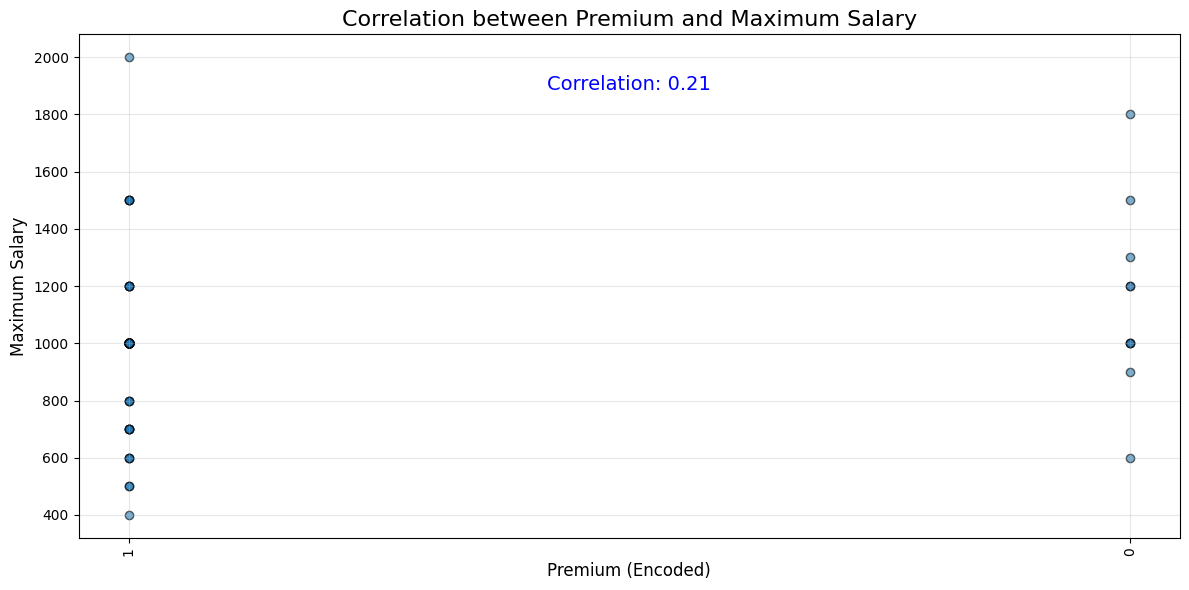

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The path to the CSV file
file_path = "scraped_data_team_20.csv"
# Load the data from the CSV file into a DataFrame
data = pd.read_csv(file_path)


try:
    # Check if the 'Premium' column exists in the dataset
    if 'Premium' in data:
        # Convert 'Premium' to numeric codes fr better working
        premium_encoded = data['Premium'].astype('category').cat.codes

        # Add these numeric codes back to the dataset as a new column
        data['Premium_Encoded'] = premium_encoded

        # Calculate the correlation between 'Premium_Encoded' and 'Salary_Max'
        correlation_max_salary = data[['Premium_Encoded', 'Salary_Max']].corr().iloc[0, 1]

        # Print out the correlation result (how closely are these related?)
        print(f"Correlation between premium and maximum salary: {correlation_max_salary:.2f}")

        # Visualize the relationship with a scatter plot
        plt.figure(figsize=(12, 6))
        # Create the scatter plot
        plt.scatter(premium_encoded, data['Salary_Max'], alpha=0.6, edgecolor='k')
        plt.title('Correlation between Premium and Maximum Salary', fontsize=16)
        plt.xlabel('Premium (Encoded)', fontsize=12)  # Label for X-axis
        plt.ylabel('Maximum Salary', fontsize=12)  # Label for Y-axis
        # Show 'Premium' values on the X-axis
        plt.xticks(ticks=np.unique(premium_encoded), labels=data['Premium'].unique(), rotation=90)
        plt.grid(alpha=0.3)

        # Add the correlation value as a text annotation on the plot
        plt.text(
            0.5, 0.9,
            f'Correlation: {correlation_max_salary:.2f}',
            horizontalalignment='center',
            verticalalignment='center',
            transform=plt.gca().transAxes,  # Use relative coordinates within the plot
            fontsize=14,
            color='blue'
        )


        plt.tight_layout()
        plt.show()

    else:
        # If the 'Premium' column isn't found, error message
        print("Oops! The 'Premium' column is missing from the dataset. Double-check the data structure.")
except Exception as e:
    # Catch and display any unexpected errors//error handling
    print(f"Something went wrong: {e}")
